# EDA on Speech Dataset

In [1]:
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as transforms
import matplotlib.pyplot as plt

from IPython.display import Audio

In [14]:
audio_path = "Deep-Speech-2/src/Deep-Speech-2/neuralnet/data/LibriSpeech/test-clean/61/70968/61-70968-0000.flac"

Sample Rate of Deep-Speech-2/src/Deep-Speech-2/neuralnet/data/LibriSpeech/test-clean/61/70968/61-70968-0000.flac: 16000


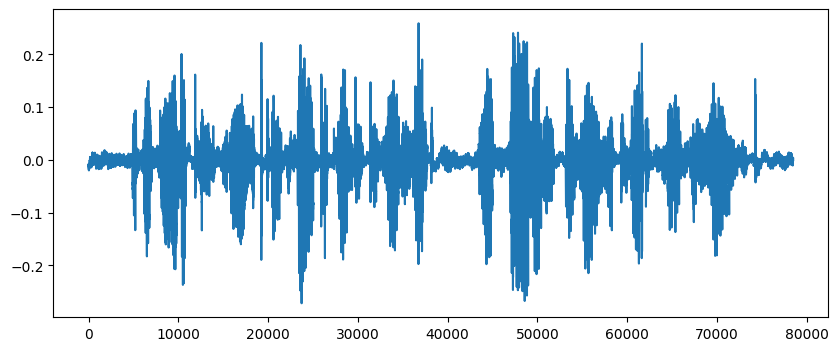

In [15]:
# Load the sample audio file
waveform, sample_rate = torchaudio.load(audio_path)

print(f"Sample Rate of {audio_path}: {sample_rate}")

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.show()

# Play the audio
display(Audio(audio_path))

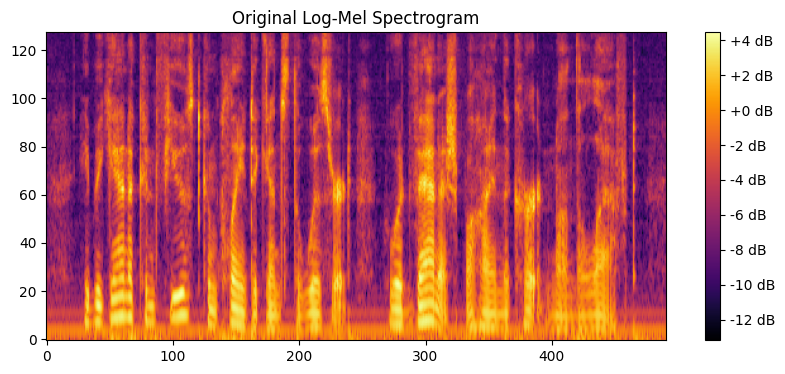

In [31]:
# Load the sample audio file
log_mel_spec_transform = transforms.MelSpectrogram(
    sample_rate=16000,
    n_mels=128,
    win_length=400,
    hop_length=160,
    n_fft = 1024
)

# Compute the log-mel spectrogram
log_mel_spec = log_mel_spec_transform(waveform)
log_mel_spec = torch.log(log_mel_spec + 1e-14)  # Avoid log(0)

# Display the original spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(log_mel_spec.squeeze(0).numpy(), cmap='inferno', origin='lower', aspect='auto')
plt.title("Original Log-Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

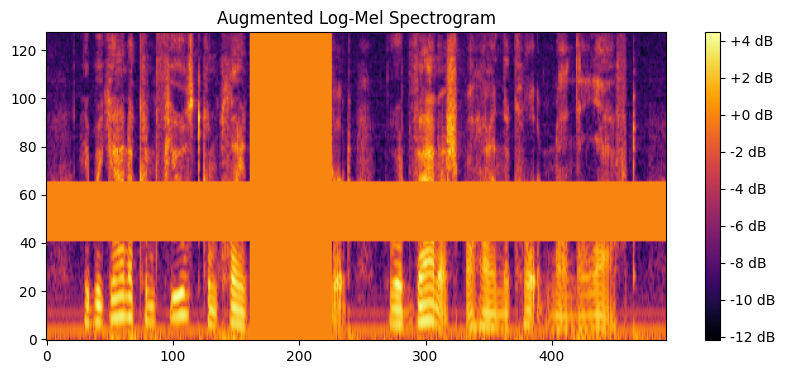

In [27]:
# Normal SpecAugment transformations
spec_augment = nn.Sequential(
                transforms.FrequencyMasking(freq_mask_param=30),
                transforms.TimeMasking(time_mask_param=70)
)

# Applying SpecAugment
augmented_log_mel_spec = spec_augment(log_mel_spec)

# Display augmented spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(augmented_log_mel_spec.squeeze(0).numpy(), cmap='inferno', origin='lower', aspect='auto')
plt.title("Augmented Log-Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

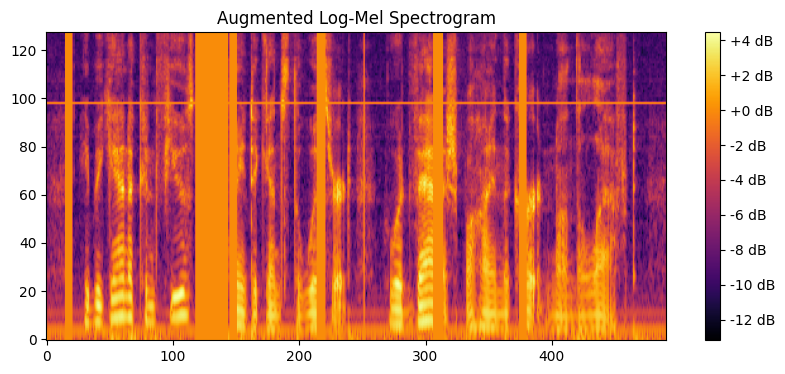

In [26]:
# Heavy SpecAugment transformations
time_masks = [torchaudio.transforms.TimeMasking(time_mask_param=15, p=0.05) for _ in range(10)]

spec_augment = nn.Sequential(
                transforms.FrequencyMasking(freq_mask_param=25),
                *time_masks
            )

# Applying SpecAugment
augmented_log_mel_spec = spec_augment(log_mel_spec)

# Display augmented spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(augmented_log_mel_spec.squeeze(0).numpy(), cmap='inferno', origin='lower', aspect='auto')
plt.title("Augmented Log-Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()